# Face Detection with Haar Cascades

## Name : Sai Hrishi M
## Reg No : 212224240140

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

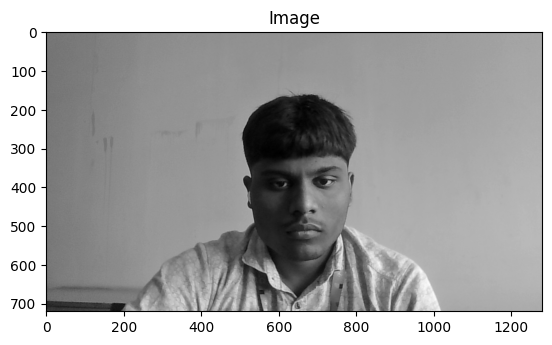

In [34]:
img = cv2.imread(r"C:\Users\admin\Pictures\Camera Roll\WIN_20251115_09_50_31_Pro.jpg", 0)
plt.imshow(img, cmap='gray')
plt.title("Image")
plt.show()

In [35]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [36]:
def detect_face(img):
    image_copy = img.copy()
    faces = face_cascade.detectMultiScale(image_copy, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (255, 255, 255), 10)
    return image_copy

In [37]:
def detect_eyes(img):
    image_copy = img.copy()
    eyes = eye_cascade.detectMultiScale(image_copy, 1.3, 5)
    for (x, y, w, h) in eyes:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (255, 255, 255), 10)
    return image_copy

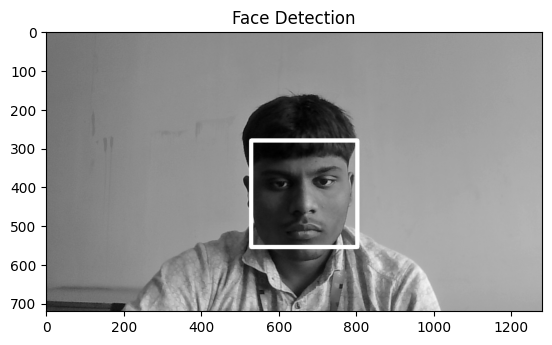

In [38]:
face_detected = detect_face(img)
plt.imshow(face_detected, cmap='gray')
plt.title("Face Detection")
plt.show()

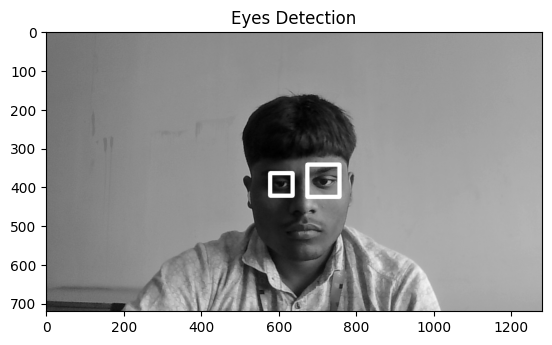

In [39]:
eyes_detected = detect_eyes(img)
plt.imshow(eyes_detected, cmap='gray')
plt.title("Eyes Detection")
plt.show()

In [40]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 255), 2)
        cv2.putText(frame, 'Face', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
    cv2.imshow('Face Detection', frame)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()